In [2]:
import numpy
import matplotlib
import routines
#matplotlib.use('svg')
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import savgol_filter
eV=27.2114

In [3]:
def LoadData(name, M, skip,No):
    f=open(name)
    data = []
    n=0
    start=0
    for i, line in enumerate(f):
        if line.find("End of self-consistent calculation") > 0:
            start = i
    f.seek(0)
    start+=3
    for i, line in enumerate(f):
        if i > start and i < (start + M*(numpy.ceil(No/8.) + skip)):
            if n < numpy.ceil(No/8.):
                data = numpy.append(data, numpy.fromstring(line, sep=' '))
            n+=1
            if n == numpy.ceil(No/8.)+skip:
                n = 0
    return data

In [4]:
def loadBand(fname,n_bands,x_size):
    Bands=numpy.zeros((n_bands,x_size,2))
    for i in range(n_bands):
        Bands[i]=numpy.loadtxt(fname,skiprows=i*(x_size+1),max_rows=x_size)
    return Bands

In [22]:
PBox=numpy.array([[-2.780116852428872,0.000000000000000,4.806373972677576],
                 [0.000000000000000,9.884202456312384,0.000000000000000],
                 [5.560233704857745,0.00000000000000,0.000000000000000]])
V=numpy.linalg.det(PBox)
BZvec=numpy.stack((numpy.cross(PBox[1],PBox[2])/V,numpy.cross(PBox[2],PBox[0])/V,numpy.cross(PBox[0],PBox[1])/V))
#BZvec=numpy.asmatrix(BZvec)
print(BZvec)


[[-0.         -0.          0.20805705]
 [-0.          0.10117154 -0.        ]
 [ 0.17984856 -0.          0.10402853]]


In [4]:
U24=loadBand('U24_K1/bands.out.gnu',24,174)

In [5]:
#U24_K2=loadBand('U24_K2/bands.out.gnu',24,199)

In [6]:
#U24_K3_1=loadBand('U24_K3/bands.out.gnu',24,201)
U24_K3=loadBand('U24_ax/bands.out.gnu',24,24)

In [7]:
U24_KGen=loadBand('U24_KGen/bands.out.gnu',24,200)

In [8]:
U24_8=numpy.reshape(LoadData('U24_KGen/H2.out',260,8,24),(260,24))/eV

In [9]:
U24_KShift=loadBand('U24_KShift/bands.out.gnu',24,199)

In [10]:
U24_KShift_sh=loadBand('U24_KShift/bands_sh.out.gnu',24,199)

In [11]:
U24_KShift_sh_6=loadBand('U24_KShift/bands_sh_6.out.gnu',24,199)

In [12]:
U24_KShift_sh1=loadBand('U24_KShift/bands_sh1.out.gnu',24,200)

In [13]:
U24_KShift_sh1_8=loadBand('U24_KShift/bands_sh1_8.out.gnu',24,200)

In [14]:
U24_KShift_sh2_6=loadBand('U24_KShift/bands_sh2_6.out.gnu',24,199)

In [15]:
U24_KShift_sh2_8=loadBand('U24_KShift/bands_sh2_8.out.gnu',24,199)

In [16]:
C2c96=loadBand('C2cp250/vdW_1/bands.out.gnu',64,128)

In [17]:
C2c96_6=numpy.reshape(LoadData('C2cp250/vdW6x6/H2.out',108,13,64),(108,64))/eV

In [18]:
C2c96_8=numpy.reshape(LoadData('C2cp250/vdW8x8/H2.out',256,13,64),(256,64))/eV

In [19]:
C2c96_6_G=numpy.reshape(LoadData('C2cp250/vdW_G/H2.out',112,13,64),(112,64))/eV

In [20]:
U24_K12=numpy.reshape(LoadData('U24_K12/H2.out',432,8,24),(432,24))/eV

In [24]:
SCbvec=[[8.992427774450754E-002,0.0,0.0],
         [0.0,1.011715416008468E-001,0.0],
         [0.0,0.0,1.040285260452706E-001]]
tile=numpy.linalg.solve(SCbvec,BZvec)


In [54]:
U24_8_Kp[numpy.argmax(U24_8[:,11])]

array([0.0449621, 0.0126464, 0.0260071])

In [55]:
U24_KGen_Kp[numpy.argmax(U24_KGen[11,:,1])]

array([0.       , 0.       , 0.0532829])

In [56]:
U24_8_Kp[numpy.argmin(U24_8[:,12])]

array([-0.0899243,  0.       , -0.1560428])

In [57]:
U24_KGen_Kp[numpy.argmin(U24_KGen[12,:,1])]

array([0., 0., 0.])

In [117]:
numpy.min(Bands_QMCT200[0][3])-numpy.max(Bands_QMCT200[0][2])

1.7939201535700207

In [64]:
C2c96_6kp_unfld[48,numpy.argmin(Bands_QMCT200[0][3])]

array([-0.0824298, -0.008431 , -0.0433454])

In [65]:
C2c96_6kp_unfld[47,numpy.argmax(Bands_QMCT200[0][2])]

array([-0.05239027, -0.00843083,  0.02603866])

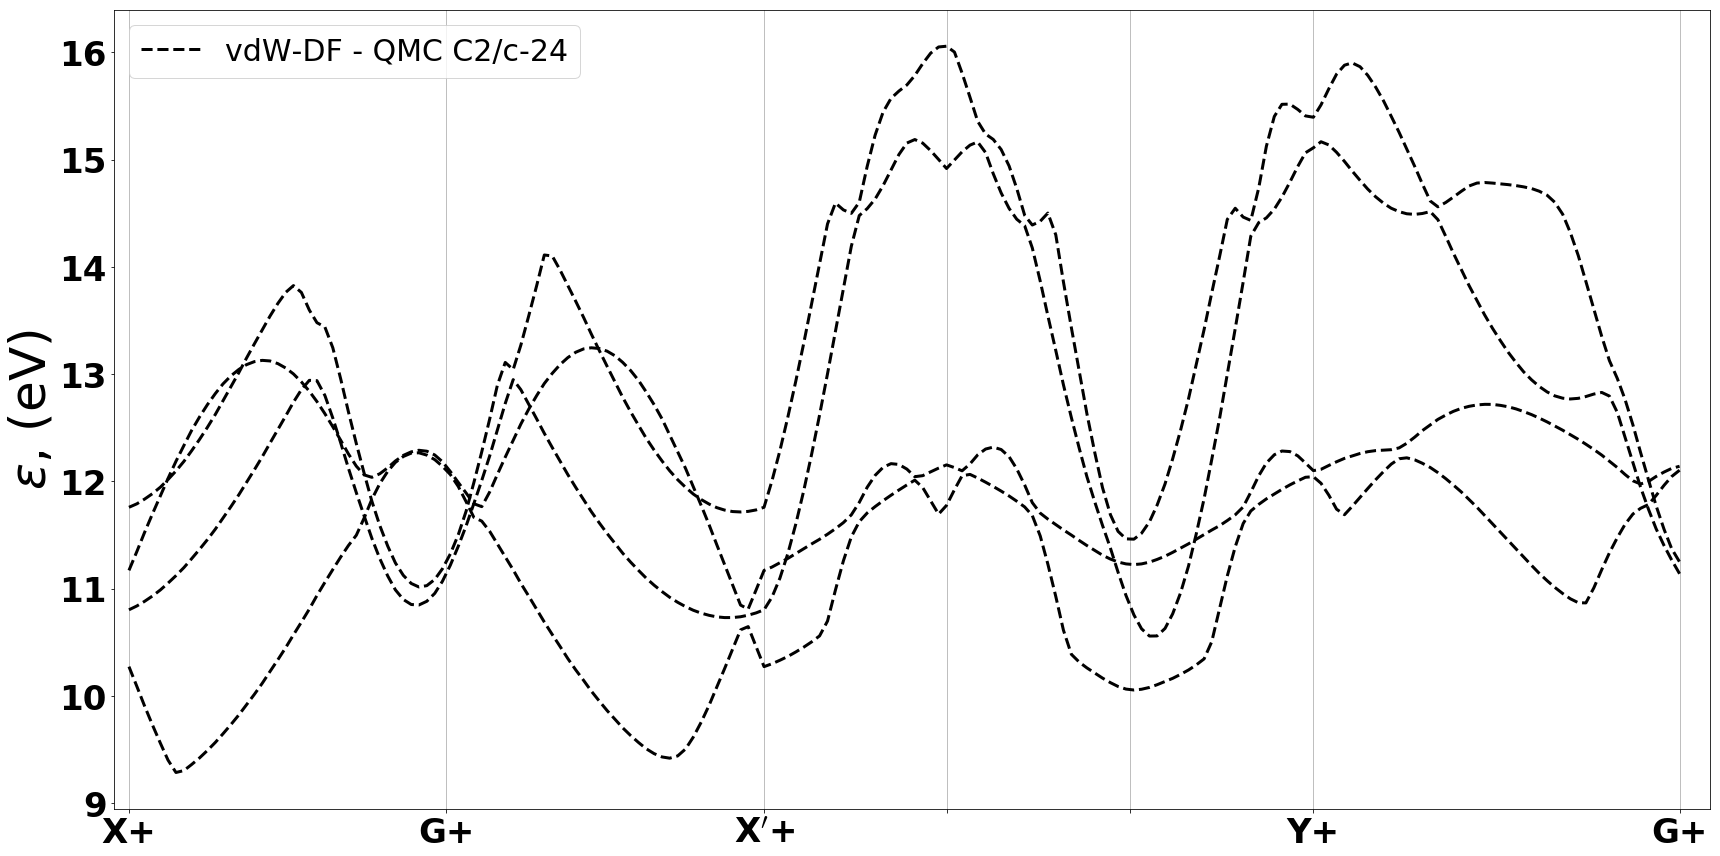

In [87]:
plt.figure(figsize=(24, 12))
#plt.style.use('dark_background')

#plt.subplot(1,2,1)
plt.xticks(fontsize=34,fontweight='bold')
plt.yticks(fontsize=34,fontweight='bold')
plt.ylabel('$\epsilon$, (eV)', fontsize=50)
plt.xticks([0.0,0.2081/2,0.2081,0.2679,(0.2679+0.3881)/2,0.3881,0.5081],['X+','G+','X$\'$+','','','Y+','G+'])#,'U$_2$','R$_2$','G','V','X','G'])
plt.grid(axis='x')

plt.plot(U24_KShift_sh2_8[11,:,0],U24_KShift_sh2_8[11,:,1]+5.4,'--',color='black',linewidth=3)
#plt.errorbar(U24_KShift_sh2_8[11,unfld8_sh2[:,1],0],Bands_QMC[0][unfld8_sh2[:,0]-44,unfld8_sh2[:,2]],yerr=Bands_QMC[1][unfld8_sh2[:,0]-44,unfld8_sh2[:,2]],fmt='o',markersize=15)
#plt.errorbar(U24_KShift_sh2_6[11,unfld6_sh2[:,1],0],Bands_QMCT200[0][unfld6_sh2[:,0]-45,unfld6_sh2[:,2]],yerr=Bands_QMCT200[1][unfld6_sh2[:,0]-45,unfld6_sh2[:,2]],fmt='o',markersize=15)
plt.legend(['vdW-DF - QMC C2/c-24',
            #'QMC Ideal',
            #'QMC T200'
           ],loc='upper left',fontsize=30)


plt.plot(U24_KShift_sh2_8[10,:,0],U24_KShift_sh2_8[10,:,1]+5.4,'--',color='black',linewidth=3)
plt.plot(U24_KShift_sh2_6[12,:,0],U24_KShift_sh2_6[12,:,1],'--',color='black',linewidth=3)
plt.plot(U24_KShift_sh2_6[13,:,0],U24_KShift_sh2_6[13,:,1],'--',color='black',linewidth=3)

#plt.plot([0,0.5081],[numpy.max(Bands_QMCT200[0][2,unfld6_sh2[numpy.where(unfld6_sh2[:,0]-45==2)[0],2]]),numpy.max(Bands_QMCT200[0][2,unfld6_sh2[numpy.where(unfld6_sh2[:,0]-45==2)[0],2]])],'-.',color='red')
#plt.plot([0,0.5081],[numpy.min(Bands_QMCT200[0][3,unfld6_sh2[numpy.where(unfld6_sh2[:,0]-45==3)[0],2]]),numpy.min(Bands_QMCT200[0][3,unfld6_sh2[numpy.where(unfld6_sh2[:,0]-45==3)[0],2]])],'-.',color='red')

#plt.plot([-0.005,0.6],[8.245054200000002,8.245054200000002],color='gray')
#plt.plot([-0.005,0.6],[9.959372400000003,9.959372400000003],color='gray')

plt.xlim([-0.005,0.5181])
plt.tight_layout()
#plt.savefig('BSunfld_sh2_C2cp250QMCDFT2.pdf',dpi=300,format='pdf')


In [195]:
"put the Bloch vectors of indirect gap to check whether they are close and can be excited eith the phonon"

'put the Bloch vectors of indirect gap to check whether they are close and can be excited eith the phonon'

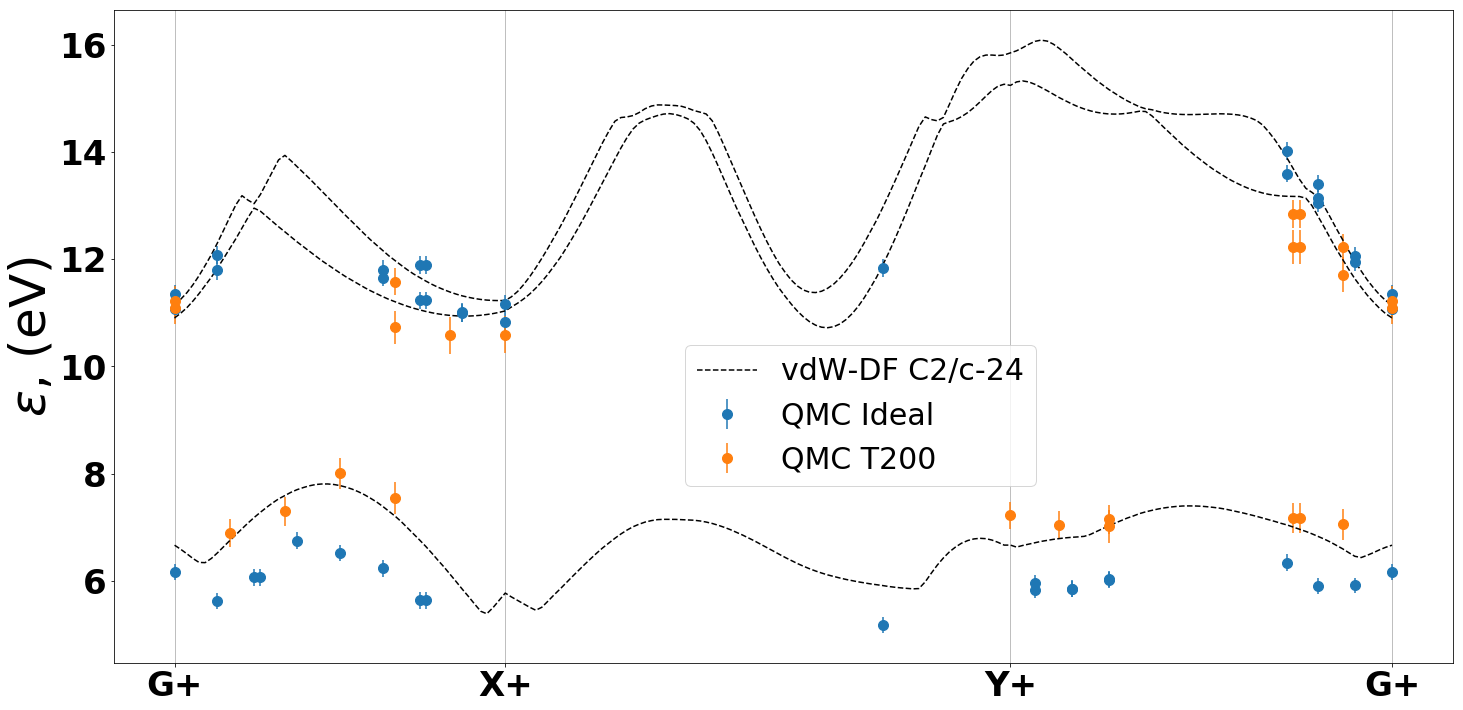

In [159]:
plt.figure(figsize=(24, 12))

#plt.subplot(1,2,1)
plt.xticks(fontsize=34,fontweight='bold')
plt.yticks(fontsize=34,fontweight='bold')
plt.ylabel('$\epsilon$, (eV)', fontsize=50)
plt.xticks([0.0,0.104,0.2629,0.3829],['G+','X+','Y+','G+'])#,'U$_2$','R$_2$','G','V','X','G'])
plt.grid(axis='x')
plt.plot(U24_KShift_sh1_8[11,:,0],U24_KShift_sh1_8[11,:,1],'--',color='black')
plt.errorbar(U24_KShift_sh1_8[11,unfld8[:,1],0],Bands_QMC[0][unfld8[:,0]-44,unfld8[:,2]],yerr=Bands_QMC[1][unfld8[:,0]-44,unfld8[:,2]],fmt='o',markersize=10)
plt.errorbar(U24_KShift_sh1[11,unfld6[:,1],0],Bands_QMCT200[0][unfld6[:,0]-45,unfld6[:,2]],yerr=Bands_QMCT200[1][unfld6[:,0]-45,unfld6[:,2]],fmt='o',markersize=10)
plt.legend(['vdW-DF C2/c-24','QMC Ideal','QMC T200'],bbox_to_anchor=(0.7, .51),fontsize=30)

plt.plot(U24_KShift_sh1_8[12,:,0],U24_KShift_sh1_8[12,:,1],'--',color='black')
plt.plot(U24_KShift_sh1_8[13,:,0],U24_KShift_sh1_8[13,:,1],'--',color='black')



#plt.plot(U24_KShift_sh1[11,unfld6[:,1],0],C2c96_6[unfld6[:,2],unfld6[:,0]]*eV,'x',markersize=10)
#plt.plot(U24_KShift_sh1_8[11,unfld8[:,1],0],C2c96_8[unfld8[:,2],unfld8[:,0]]*eV,'x',markersize=10)

#plt.savefig('BSunfld_C2cp250T200.pdf',dpi=300,format='pdf')


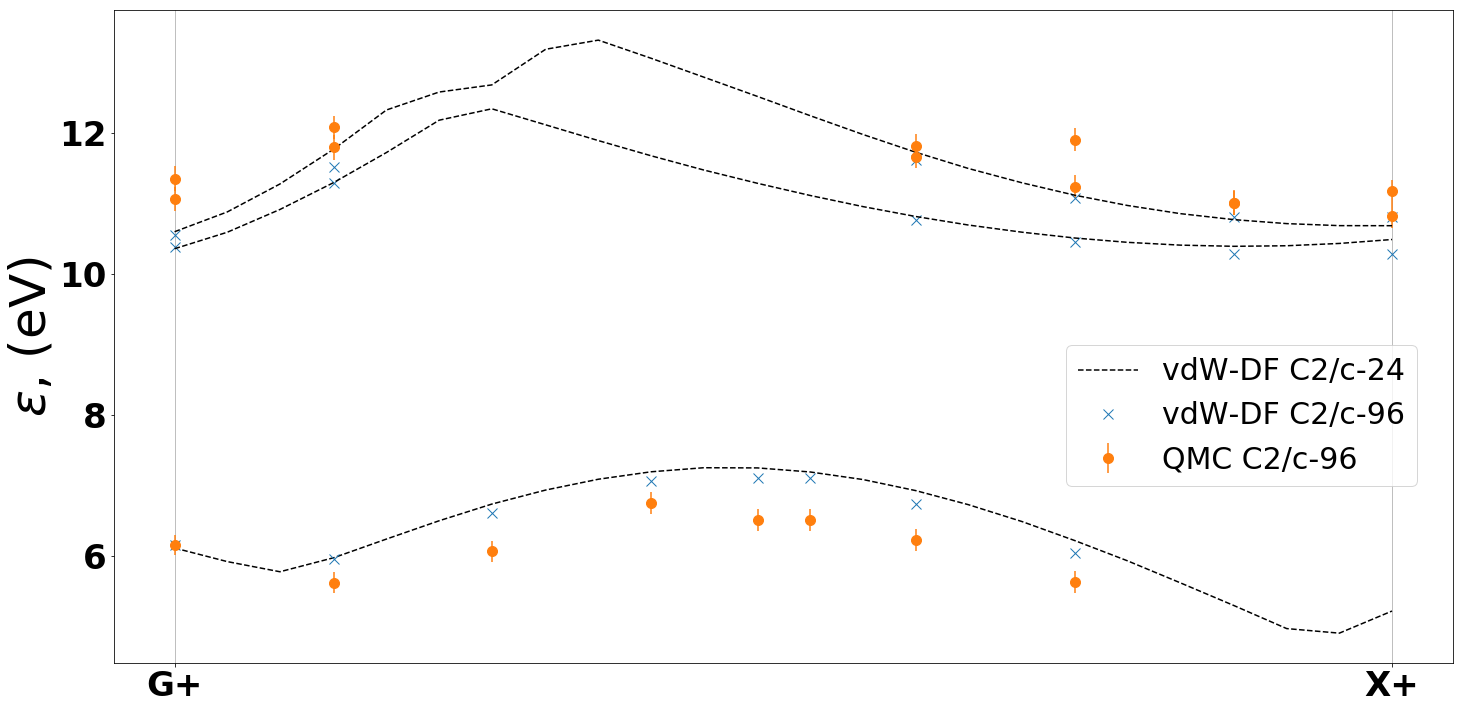

In [566]:
plt.figure(figsize=(24, 12))

#plt.subplot(1,2,1)
plt.xticks(fontsize=34,fontweight='bold')
plt.yticks(fontsize=34,fontweight='bold')
plt.ylabel('$\epsilon$, (eV)', fontsize=50)
plt.xticks([0.0,0.104],['G+','X+'])#,'U$_2$','R$_2$','G','V','X','G'])
plt.grid(axis='x')
#plt.plot([0,numpy.max(U24_K3[11,:,0])],[numpy.min(U24_K3[12,:,1]),numpy.min(U24_K3[12,:,1])],':',color='black')
#plt.plot([0,numpy.max(U24_K3[11,:,0])],[numpy.max(U24_K3[11,:,1]),numpy.max(U24_K3[11,:,1])],'--',color='black')
#plt.legend(['%.3f eV' % numpy.min(U24_K3[12,:,1]),'%.3f eV' % numpy.max(U24_K3[11,:,1])],bbox_to_anchor=(0.3, .51),fontsize=34)
plt.plot(U24_K3[11,:,0],U24_K3[11,:,1]-.55,'--',color='black')
plt.plot(U24_K3[11,unfld[:,1],0],C2c96_8[unfld[:,2],unfld[:,0]]*eV-.55,'x',markersize=10)
plt.errorbar(U24_K3[11,unfld[:,1],0],Bands_QMC[0][unfld[:,0]-44,unfld[:,2]],yerr=Bands_QMC[1][unfld[:,0]-44,unfld[:,2]],fmt='o',markersize=10)
plt.legend(['vdW-DF C2/c-24','vdW-DF C2/c-96','QMC C2/c-96'],bbox_to_anchor=(0.7, .51),fontsize=30)

#plt.plot(U24_K3_1[11,::2,1])
plt.plot(U24_K3[12,:,0],U24_K3[12,:,1]-.55,'--',color='black')
plt.plot(U24_K3[13,:,0],U24_K3[13,:,1]-.55,'--',color='black')
#plt.plot(U24_K3[10,:,0],U24_K3[10,:,1],'--',color='black')
#plt.plot(U24_K3[9,:,0],U24_K3[9,:,1],'--',color='black')
#plt.plot(U24_K3[14,:,0],U24_K3[14,:,1])
#plt.plot(U24_K3[15,:,0],U24_K3[15,:,1])
#Bands_QMC[0]

#plt.savefig('BSunfld_C2cp250.pdf',dpi=300,format='pdf')


In [25]:
U24_8_Kp=numpy.loadtxt('U24_KShift/twistgrid.out',max_rows=260)

In [26]:
U24_K12_Kp=numpy.loadtxt('U24_K12/twistgrid.out',max_rows=432)

In [27]:
U24_KGen_Kp=numpy.loadtxt('U24_KGen/H2vdW_band.out', skiprows=150,max_rows=200,usecols=(4,5,6),converters={6: lambda x: x[:-2]})

In [28]:
U24_K3_kp=numpy.loadtxt('U24_ax/H2vdW_band_test.out', skiprows=150,max_rows=24,usecols=(4,5,6),converters={6: lambda x: x[:-2]})

In [29]:
U24_K3_kp_conv=numpy.loadtxt('U24_ax/H2vdW_band_test.out', skiprows=176,max_rows=24,usecols=(4,5,6),converters={6: lambda x: x[:-2]})

In [30]:
U24_KShift_sh1_kp=numpy.loadtxt('U24_KShift/H2vdW_band_sh1.out', skiprows=150,max_rows=200,usecols=(4,5,6),converters={6: lambda x: x[:-2]})

In [5]:
U24_KShift_sh1_8_kp=numpy.loadtxt('U24_KShift/H2vdW_band_sh1_8.out', skiprows=150,max_rows=200,usecols=(4,5,6),converters={6: lambda x: x[:-2]})

In [10]:
1/11.120467409715490/16

0.005620267359031721

In [7]:
U24_KShift_sh1_8_kp

array([[0.0056203, 0.0063232, 0.0065018],
       [0.0056203, 0.0063232, 0.0084282],
       [0.0056203, 0.0063232, 0.0103547],
       [0.0056203, 0.0063232, 0.0122811],
       [0.0056203, 0.0063232, 0.0142076],
       [0.0056203, 0.0063232, 0.0161341],
       [0.0056203, 0.0063232, 0.0180605],
       [0.0056203, 0.0063232, 0.019987 ],
       [0.0056203, 0.0063232, 0.0219134],
       [0.0056203, 0.0063232, 0.0238399],
       [0.0056203, 0.0063232, 0.0257663],
       [0.0056203, 0.0063232, 0.0276928],
       [0.0056203, 0.0063232, 0.0296192],
       [0.0056203, 0.0063232, 0.0315457],
       [0.0056203, 0.0063232, 0.0334721],
       [0.0056203, 0.0063232, 0.0353986],
       [0.0056203, 0.0063232, 0.037325 ],
       [0.0056203, 0.0063232, 0.0392515],
       [0.0056203, 0.0063232, 0.041178 ],
       [0.0056203, 0.0063232, 0.0431044],
       [0.0056203, 0.0063232, 0.0450309],
       [0.0056203, 0.0063232, 0.0469573],
       [0.0056203, 0.0063232, 0.0488838],
       [0.0056203, 0.0063232, 0.05

In [32]:
U24_KShift_sh2_6_kp=numpy.loadtxt('U24_KShift/H2vdW_band_sh2_6.out', skiprows=150,max_rows=199,usecols=(4,5,6),converters={6: lambda x: x[:-2]})

In [33]:
U24_KShift_sh2_8_kp=numpy.loadtxt('U24_KShift/H2vdW_band_sh2_8.out', skiprows=150,max_rows=199,usecols=(4,5,6),converters={6: lambda x: x[:-2]})

In [34]:
U24_KShift_kp=numpy.loadtxt('U24_KShift/H2vdW_band.out', skiprows=150,max_rows=199,usecols=(4,5,6),converters={6: lambda x: x[:-2]})

In [35]:
U24_KShift_kp_conv=numpy.loadtxt('U24_KShift/H2vdW_band.out', skiprows=351,max_rows=199,usecols=(4,5,6),converters={6: lambda x: x[:-2]})

In [36]:
tmp=numpy.loadtxt('prim_sh3.pwscf',skiprows=2,usecols=(0,1,2))

In [50]:
ind_kp_G=[]
for i in range(C2c96_kp_QMC_Gamma.shape[0]):
    for j in range(C2c96_kp_G.shape[0]):
        if numpy.sum(abs(C2c96_kp_QMC_Gamma[i]-C2c96_kp_G[j])) < 1e-4:
            ind_kp_G.append([i,j])
ind_kp_G=numpy.asarray(ind_kp_G)
ind_kp_G=ind_kp_G[numpy.where(C2c96_kp_QMC_Gamma[:,2]!=-0.0520143)]

In [51]:
SCbvec

[[0.08992427774450754, 0.0, 0.0],
 [0.0, 0.1011715416008468, 0.0],
 [0.0, 0.0, 0.1040285260452706]]

In [52]:
"compare primitive and super"
SuperPrim=[]
for i in range(U24_K3_kp.shape[0]):
    for j in range(C2c96_kp_G.shape[0]):
        if numpy.sum(abs(U24_K3_kp[i]-C2c96_kp_G[j]),axis=0)<.3e-2:
            SuperPrim.append([i,j])#47,U24_K3_kp[i],i,C2c96_kp_unfld[47,j],j
SuperPrim=numpy.asarray(SuperPrim)

In [53]:
"compare primitive and super"
def unfold(U24_kp,C96_kp_unfld,BZvec,BL,BH):
    unfld=[]
    for b in range(BL,BH):
#for b in range(47,48):
        for i in range(U24_kp.shape[0]):
            for j in range(C96_kp_unfld.shape[1]):
                if numpy.linalg.norm(U24_kp[i]-(C96_kp_unfld[b,j])-
    numpy.dot(numpy.transpose(BZvec),numpy.rint(numpy.dot(numpy.linalg.inv(numpy.transpose(BZvec)),(U24_kp[i]-(C96_kp_unfld[b,j]))))))<.13e-2:
                    unfld.append([b,i,j])#47,U24_KShift_sh1_8_kp[i],i,C2c96_kp_unfld[47,j],j
    return numpy.asarray(unfld)

In [54]:
unfld6_sh2=unfold(U24_KShift_sh2_6_kp,C2c96_6kp_unfld,BZvec,45,51)

In [55]:
unfld8_sh2=unfold(U24_KShift_sh2_8_kp,C2c96_8kp_unfld,BZvec,44,52)

In [65]:
C2c96_6kp_unfld.shape

(64, 108, 3)

In [56]:
unfld6=unfold(U24_KShift_sh1_kp,C2c96_6kp_unfld,BZvec,45,51)

In [57]:
unfld8=unfold(U24_KShift_sh1_8_kp,C2c96_8kp_unfld,BZvec,44,52)

In [37]:
C2c96_kp=numpy.loadtxt('C2cp250/vdW_1/H2vdW_band.out', skiprows=315,max_rows=128,usecols=(4,5,6),converters={6: lambda x: x[:-2]})

In [38]:
C2c96_kp_unfld=numpy.load('C2cp250/vdW_G/K_unfld.npy')#[:,ind_kp_G[:,1]]

In [39]:
C2c96_phase=numpy.load('C2cp250/vdW_G/phase.npy')

In [40]:
C2c96_kp_G=numpy.loadtxt('C2cp250/vdW_G/H2.out',skiprows=295,max_rows=216,usecols=(4,5,6),converters={6: lambda x: x[:-2]})

In [41]:
C2c96_8kp=numpy.loadtxt('C2cp250/vdW8x8/H2.out',skiprows=302,max_rows=256,usecols=(4,5,6),converters={6: lambda x: x[:-2]})

In [42]:
C2c96_8kp_unfld=numpy.load('C2cp250/vdW8x8/K_unfld.npy')#[:,numpy.where(C2c96_6kp[:,1]>0)[0]]

In [43]:
C2c96_6kp=numpy.loadtxt('C2cp250/vdW6x6/twistgrid.out',max_rows=108)

In [44]:
C2c96_6kp_unfld=numpy.load('C2cp250/vdW6x6/K_unfld.npy')#[:,numpy.where(C2c96_6kp[:,1]>0)[0]]

In [45]:
C2c96_kp_QMC=numpy.loadtxt('C2cp250/C2CP250.out', skiprows=302,max_rows=256,usecols=(4,5,6),converters={6: lambda x: x[:-2]})

In [46]:
C2CP250_QMC=numpy.loadtxt('../../IDEAL/dataC2C250_8corr.out')
V_C2CP250_QMC=numpy.loadtxt('../../IDEAL/VdataC2C250_8.out')

Bands_QMC=numpy.zeros((2,C2CP250_QMC.shape[0]-1,C2CP250_QMC.shape[1]))
for i in range(Bands_QMC.shape[1]):
    Bands_QMC[0,i]=(C2CP250_QMC[i+1]-C2CP250_QMC[i])/2.*eV
    Bands_QMC[1,i]=numpy.sqrt((V_C2CP250_QMC[i+1]**2+V_C2CP250_QMC[i]**2)/2.)*eV

In [47]:
C2CT200_QMC=numpy.load('C2CT200_corr.npy')[0]


In [48]:
C2CP250T200_QMC=numpy.load('C2CT200_corr.npy')[0]

Bands_QMCT200=numpy.zeros((2,C2CP250T200_QMC.shape[1]-1,C2CP250T200_QMC.shape[2]))
for i in range(Bands_QMCT200.shape[1]):
    Bands_QMCT200[0,i]=(numpy.average(C2CP250T200_QMC,axis=0)[i+1]-numpy.average(C2CP250T200_QMC,axis=0)[i])/2.*eV
    Bands_QMCT200[1,i]=numpy.sqrt((numpy.std(C2CP250T200_QMC,axis=0)[i+1]**2+numpy.std(C2CP250T200_QMC,axis=0)[i]**2)/(2.*39))*eV

In [49]:
C2c96_kp_QMC_Gamma=numpy.loadtxt('C2cp250/RMC_Gamma/C2CP250.out', skiprows=302,max_rows=112,usecols=(4,5,6),converters={6: lambda x: x[:-2]})

# Unfolding

In [27]:
U24_KG=numpy.reshape(LoadData('U24_KG/H2.out',108,8,24),(108,24))/eV

In [28]:
U24_K6=numpy.reshape(LoadData('tmp/U24_K3/H2.out',108,8,24),(108,24))/eV

In [29]:
U24_K24=numpy.reshape(LoadData('U24_K24/H2.out',6912,8,24),(6912,24))/eV

In [30]:
U24_K24_Kp=numpy.loadtxt('U24_K24/twistgrid.out',max_rows=6912)

In [31]:
U24_K6_Kp=numpy.loadtxt('tmp/U24_K3/twistgrid.out',max_rows=108)

In [32]:
U24_KG_Kp=numpy.loadtxt('U24_KG/twistgrid.out',max_rows=108)

In [33]:
U24_K24.shape

(6912, 24)

In [34]:
print numpy.min(U24_K24[:,12]-U24_K24[:,11])*eV
print numpy.argmin(U24_K24[:,12]-U24_K24[:,11])
print U24_K24_Kp[numpy.argmin(U24_K24[:,12]-U24_K24[:,11])]

3.8236
4048
[ 0.0562811 -0.0325545  0.0021077]


In [35]:
print numpy.min(U24_K6[:,12]-U24_K6[:,11])*eV
print numpy.argmin(U24_K6[:,12]-U24_K6[:,11])
print U24_K6_Kp[numpy.argmin(U24_K6[:,12]-U24_K6[:,11])]

4.345000000000001
5
[ 0.0074937  0.008431  -0.008669 ]


In [36]:
print numpy.min(U24_KG[:,12]-U24_KG[:,11])*eV
print numpy.argmin(U24_KG[:,12]-U24_KG[:,11])

3.9180999999999986
0


In [37]:
print numpy.min(C2c96_6[:,48]-C2c96_6[:,47])*eV
print numpy.argmin(C2c96_6[:,48]-C2c96_6[:,47])
print C2c96_6kp[numpy.argmin(C2c96_6[:,48]-C2c96_6[:,47])]
print [ 0.00664081, -0.01331119,  0.02991464]

3.4368000000000007
32
[ 0.0074937 -0.008431   0.0433452]
[0.00664081, -0.01331119, 0.02991464]


In [38]:
print (numpy.min(C2c96_6[:,48])-numpy.max(C2c96_6[:,47]))*eV
print C2c96_6kp[numpy.argmin(C2c96_6[:,48])],C2c96_6kp[numpy.argmax(C2c96_6[:,47])]


2.9729000000000014
[ 0.0074937 -0.008431   0.008669 ] [ 0.0374684 -0.008431   0.0260071]


In [39]:
print (numpy.min(U24_K6[:,12])-numpy.max(U24_K6[:,11]))*eV
print U24_K6_Kp[numpy.argmin(U24_K6[:,12])],C2c96_6kp[numpy.argmax(U24_K6[:,11])]


3.416800000000002
[ 0.0074937  0.008431  -0.008669 ] [0.0374684 0.0252929 0.008669 ]


# Sand Box

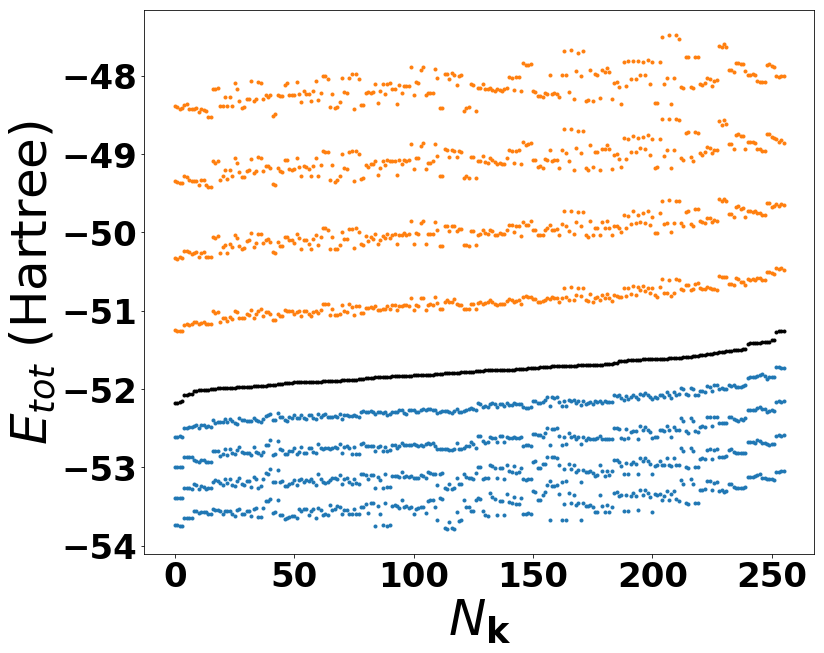

In [568]:
plt.figure(figsize=(12, 10))

#plt.subplot(1,2,1)
plt.xticks(fontsize=34,fontweight='bold')
plt.yticks(fontsize=34,fontweight='bold')

plt.ylabel('$E_{tot}$ (Hartree)', fontsize=50)
plt.xlabel('$N_{\mathbf{k}}$', fontsize=50)
ind=numpy.argsort(C2CP250_QMC[4])
x=numpy.arange(256)

plt.errorbar(x,C2CP250_QMC[4,ind],color='black',fmt='.')
for i in range(4):
    plt.errorbar(x,C2CP250_QMC[i,ind],color='C0',fmt='.')
    
for i in range(5,9):
    plt.errorbar(x,C2CP250_QMC[i,ind],yerr=V_C2CP250_QMC[i,ind],color='C1',fmt='.')
    
#plt.savefig('Etot_C2cp250_QMC.pdf',dpi=300,format='pdf')


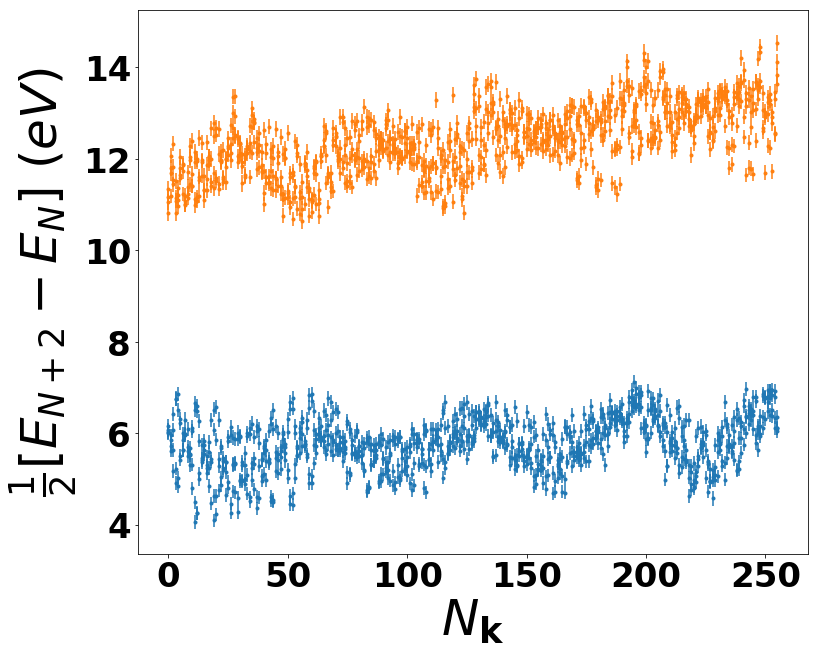

In [573]:
plt.figure(figsize=(12, 10))

#plt.subplot(1,2,1)
plt.xticks(fontsize=34,fontweight='bold')
plt.yticks(fontsize=34,fontweight='bold')

plt.ylabel('$\\frac{1}{2}[E_{N+2}-E_N]$ $(eV)$', fontsize=50)
plt.xlabel('$N_{\mathbf{k}}$', fontsize=50)
#ind=numpy.argsort(C2CP250_QMC[4])
x=numpy.arange(256)

for i in range(3):
    plt.errorbar(x,Bands_QMC[0,i],yerr=Bands_QMC[1,i],color='C0',fmt='.')
for i in range(4,8):
    plt.errorbar(x,Bands_QMC[0,i],yerr=Bands_QMC[1,i],color='C1',fmt='.')
plt.errorbar(x,Bands_QMC[0,3],yerr=Bands_QMC[1,3],color='C0',fmt='.')

#plt.savefig('Bnds_C2cp250_QMC.pdf',dpi=300,format='pdf')

#plt.plot(C2c96_8[:,47]*eV)
#plt.plot(C2c96_8[:,48]*eV)
#plt.plot(C2c96_8[:,49]*eV)
#plt.plot(C2c96_8[:,50]*eV)

In [576]:
Bands_QMC_flat=Bands_QMC[0,0]
for i in range(1,8):
    Bands_QMC_flat=numpy.append(Bands_QMC_flat,Bands_QMC[0,i])

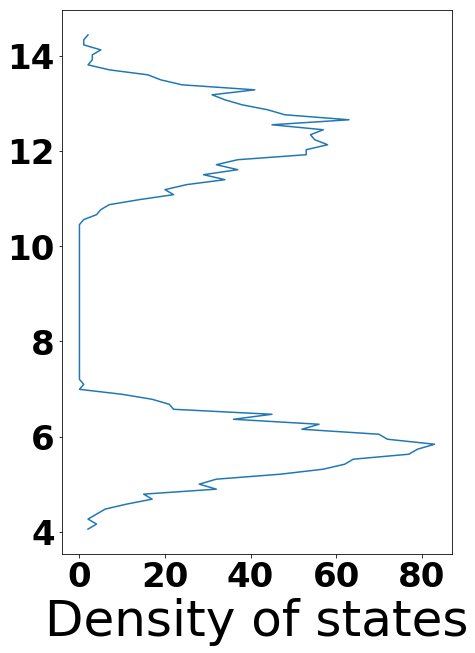

In [595]:
plt.figure(figsize=(7, 10))

#plt.subplot(1,2,1)
plt.xticks(fontsize=34,fontweight='bold')
plt.yticks(fontsize=34,fontweight='bold')

#plt.ylabel('$\\frac{1}{2}[E_{N+2}-E_N]$ $(eV)$', fontsize=50)
plt.xlabel('Density of states', fontsize=50)

hss=numpy.histogram(Bands_QMC_flat,100)
plt.plot(hss[0],hss[1][:-1])

#plt.savefig('DoS_C2cp250_QMC.pdf',dpi=300,format='pdf')
